In [3]:
using Plots, Optim, LinearAlgebra, LaTeXStrings

In [39]:
abstract type BoseHubbardModel end

struct MeanField <: BoseHubbardModel
    n_max :: Int64
    a :: Matrix{Float64}
    n :: Matrix{Float64}

    MeanField(n_max) = new(n_max, diagm(1 => sqrt.(1:n_max)), diagm(0 => 0:n_max))
end

function get_hamiltonian(model :: MeanField, t, mu, V, z, psi)
    H = -mu * model.n + 0.5 * model.n * (model.n - I) + 0.5 * V * z * (psi^2 * model.n - psi^4 * I) - t * z * psi * (model.a + model.a') + t * z * psi^2 * I
    return H 
end

function get_order_parameter(model, t, mu, V, z)
    E_gs(psi) = eigvals(get_hamiltonian(model, t, mu, z, psi[1]))[1]
    return Optim.minimizer(optimize(E_gs, zeros(1)))[1]
end

# find N for the ground state
function get_num_particles(model, t, mu, V, z)
    psi = get_order_parameter(model, t, mu, V, z)
    gs = eigvecs(get_hamiltonian(model, t, mu, V, z, psi))[:, 1]
    
    return gs' * model.n * gs
end

get_num_particles (generic function with 2 methods)

In [58]:
model = MeanField(10)

z, size = 2, 100
t = range(start = 0, stop = 0.1, length = size)
mu = range(start = 0, stop = 3, length = size)
V = 2

order_param = zeros((size, size))
num_particles = zeros((size, size))

for k1 in 1:size, k2 in 1:size
    order_param[k2, k1] = abs(get_order_parameter(model, t[k1], mu[k2], V, z))
    num_particles[k2, k1] = abs(get_num_particles(model, t[k1], mu[k2], V, z))
end


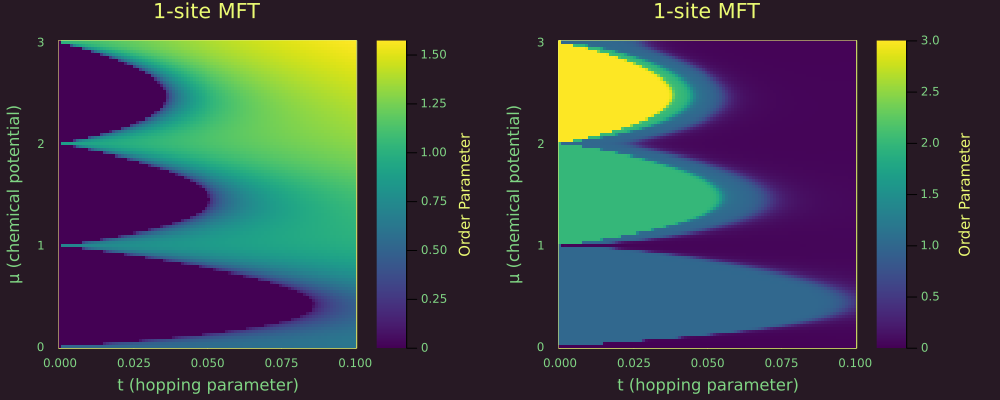

In [59]:
theme(:lime)
gr()
p1 = heatmap(t, mu, order_param)
plot!(
    ylabel = "μ (chemical potential)",
    xlabel = "t (hopping parameter)",
    framestyle = :box, 
    title = "1-site MFT",  
    colorbar_title = "Order Parameter")

p2 = heatmap(t, mu, num_particles)
plot!(
    ylabel = "μ (chemical potential)",
    xlabel = "t (hopping parameter)",
    framestyle = :box, 
    title = "1-site MFT",  
    colorbar_title = "Order Parameter")

plot(p1, p2, layout = (1, 2), size = (1000, 400), leftmargin = 5Plots.mm, bottommargin = 5Plots.mm, topmargin = 5Plots.mm, rightmargin = 5Plots.mm)